In [10]:
from tropy.svm import TropicalSVM
from tropy.metrics import accuracy_multiple, veronese_feature_names, print_features_per_class
from tropy.veronese import hypersurface_polymake_code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [11]:
base_df = pd.read_csv('./notebooks/data/IRIS.csv')
df = base_df.loc[:, 'sepal_length':'petal_length']
features = df.columns.to_list()
classes = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]

def class_df(class_name, size=None):
  df_class = df[base_df["species"].str.contains(class_name)]
  df_train, df_test = train_test_split(df_class, test_size=0.5, random_state=43)
  Ctrain, Ctest = df_train.to_numpy(dtype=float).T, df_test.to_numpy(dtype=float).T
  print(Ctrain.shape, Ctest.shape)
  return Ctrain, Ctest

In [12]:
size = 2

In [13]:
Clist_train, Clist_test = [], []
for class_name in classes:
  train, test = class_df(class_name, size)
  Clist_train.append(train)
  Clist_test.append(test)

(3, 25) (3, 25)
(3, 25) (3, 25)
(3, 25) (3, 25)


In [14]:
model = TropicalSVM()
model.fit(Clist_train, size)
print("Apex:", model.apex)

Apex: [-0.367  1.533 -1.567  3.133 -2.967  0.233]


In [15]:
accuracy = accuracy_multiple(model.predict, Clist_test)
print(f"Accuracy: {round(accuracy, 3)}")

Accuracy: 0.933


In [16]:
print_features_per_class(classes, veronese_feature_names(features, model.veronese_coefficients), model.sector_indicator)

Dominant features for each class:
- Iris-setosa: 2*sepal_width
- Iris-virginica: sepal_length + petal_length, 2*petal_length
- Iris-versicolor: sepal_length + sepal_width, sepal_width + petal_length, 2*sepal_length


In [17]:
hypersurface_polymake_code(model.veronese_coefficients, model.apex, 3)

'$C = new Hypersurface<Max>(MONOMIALS=>[[1, 1, 0], [1, 0, 1], [0, 1, 1], [2, 0, 0], [0, 2, 0], [0, 0, 2]], COEFFICIENTS=>[0.3666666017845279, -1.5333333807066094, 1.566666601784528, -3.1333329616114507, 2.9666665373370056, -0.23333339858800128]);'

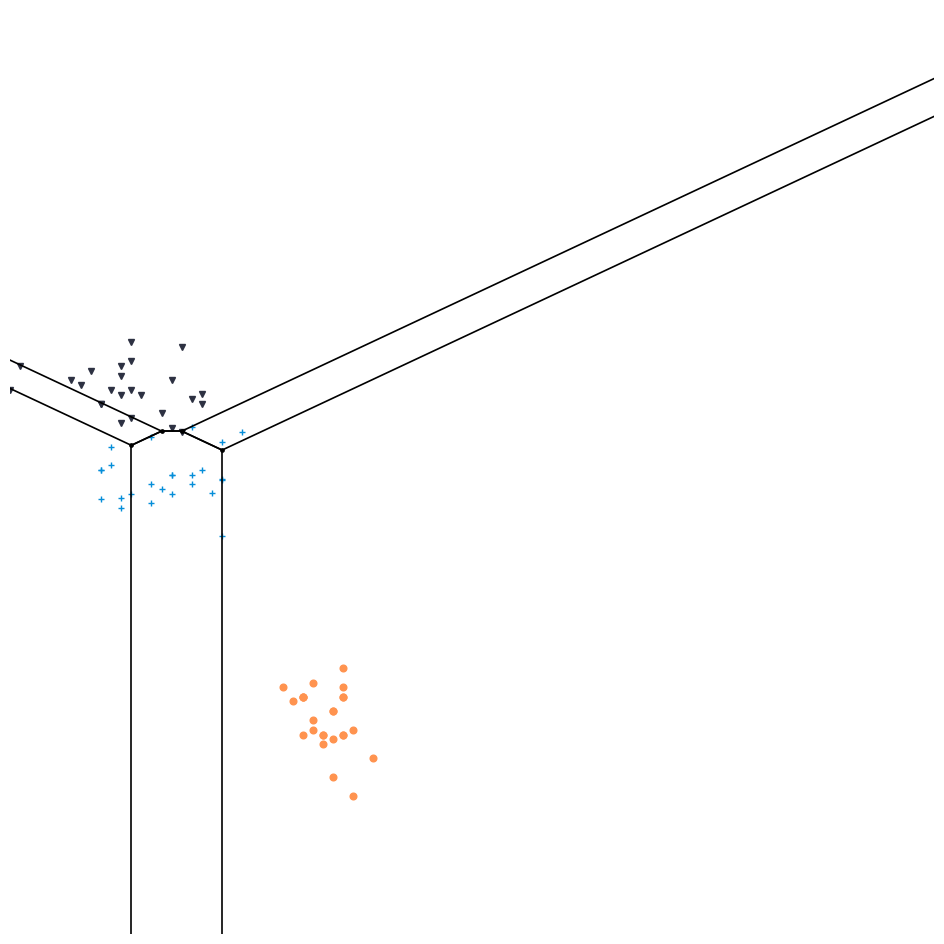

In [18]:
import matplotlib.pyplot as plt
from tropy.graph import init_ax, plot_classes, plot_polynomial_hypersurface_3d

fig = plt.figure(figsize=(12,12))
L = 2
ax = init_ax(fig, 111, L)

plot_classes(ax, Clist_train, L, features=features)

plot_polynomial_hypersurface_3d(ax, model.veronese_coefficients, model.apex, L)